In [32]:
%pip install pandas numpy matplotlib seaborn psycopg2-binary sqlalchemy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Import necessary libraries
import psycopg2
import pandas as pd

# Define the connection parameters
host = 'localhost'        
port = '5432'             # Default PostgreSQL port
dbname = 'telecom_db'  
user = 'postgres'        
password = 'neba'  

# Establish the connection
conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

In [8]:
# Load data into a pandas DataFrame
query = "SELECT * FROM xdr_data;"  # Replace with your table name
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display the first few rows of the DataFrame
print(df.head())

C:\Users\neba\AppData\Local\Temp\ipykernel_13816\1015314531.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [13]:
import pandas as pd


# Ensure the columns are numeric where needed
df['Total DL (Bytes)'] = pd.to_numeric(df['Total DL (Bytes)'], errors='coerce')
df['Total UL (Bytes)'] = pd.to_numeric(df['Total UL (Bytes)'], errors='coerce')
df['Dur. (ms)'] = pd.to_numeric(df['Dur. (ms)'], errors='coerce')

# Aggregate per user (IMSI)
user_overview = df.groupby('IMSI').agg(
    number_of_sessions=('Bearer Id', 'nunique'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_download_data=('Total DL (Bytes)', 'sum'),
    total_upload_data=('Total UL (Bytes)', 'sum')
).reset_index()

# Add the total data volume (Total DL + Total UL)
user_overview['total_data_volume'] = user_overview['total_download_data'] + user_overview['total_upload_data']

# Display the result
print(user_overview.head())

           IMSI  number_of_sessions  total_session_duration  \
0  2.040471e+14                   1                869844.0   
1  2.040808e+14                   1                877385.0   
2  2.082001e+14                   1                 86019.0   
3  2.082001e+14                   1                 86254.0   
4  2.082001e+14                   2                573923.0   

   total_download_data  total_upload_data  total_data_volume  
0           78697597.0         60456049.0       1.391536e+08  
1          194828056.0         37295915.0       2.321240e+08  
2           31376981.0         53794658.0       8.517164e+07  
3          392918313.0         33583272.0       4.265016e+08  
4          961767023.0         71325004.0       1.033092e+09  


In [15]:
%pip install scikit-learn

  Using cached scikit_learn-1.6.0-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.0-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
# First, create new columns for the total data of each application
df['total_social_media_data'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['total_google_data'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['total_email_data'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['total_youtube_data'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['total_netflix_data'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['total_gaming_data'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['total_other_data'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']

# Now, aggregate the data per user (IMSI)
user_behavior = df.groupby('IMSI').agg(
    number_of_sessions=('Bearer Id', 'nunique'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_download_data=('Total DL (Bytes)', 'sum'),
    total_upload_data=('Total UL (Bytes)', 'sum'),
    total_social_media_data=('total_social_media_data', 'sum'),
    total_google_data=('total_google_data', 'sum'),
    total_email_data=('total_email_data', 'sum'),
    total_youtube_data=('total_youtube_data', 'sum'),
    total_netflix_data=('total_netflix_data', 'sum'),
    total_gaming_data=('total_gaming_data', 'sum'),
    total_other_data=('total_other_data', 'sum')
).reset_index()

# Display the result
print(user_behavior.head())

           IMSI  number_of_sessions  total_session_duration  \
0  2.040471e+14                   1                869844.0   
1  2.040808e+14                   1                877385.0   
2  2.082001e+14                   1                 86019.0   
3  2.082001e+14                   1                 86254.0   
4  2.082001e+14                   2                573923.0   

   total_download_data  total_upload_data  total_social_media_data  \
0           78697597.0         60456049.0                1546088.0   
1          194828056.0         37295915.0                 715224.0   
2           31376981.0         53794658.0                3122781.0   
3          392918313.0         33583272.0                2577104.0   
4          961767023.0         71325004.0                3426716.0   

   total_google_data  total_email_data  total_youtube_data  \
0          9218647.0         3330974.0          40940710.0   
1         10438660.0         1520771.0          11959905.0   
2          162

In [19]:
# Identify missing values
missing_values = user_behavior.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Replace missing values with the mean of the column
user_behavior.fillna(user_behavior.mean(), inplace=True)

Missing values in each column:
 IMSI                       0
number_of_sessions         0
total_session_duration     0
total_download_data        0
total_upload_data          0
total_social_media_data    0
total_google_data          0
total_email_data           0
total_youtube_data         0
total_netflix_data         0
total_gaming_data          0
total_other_data           0
dtype: int64


In [20]:
# Describe the relevant variables
print(user_behavior.describe())

# Display the data types of the columns
print(user_behavior.dtypes)

               IMSI  number_of_sessions  total_session_duration  \
count  1.072650e+05       107265.000000            1.072650e+05   
mean   2.082016e+14            1.375276            1.459355e+05   
std    2.534986e+10            0.780491            1.863518e+05   
min    2.040471e+14            0.000000            7.142000e+03   
25%    2.082010e+14            1.000000            7.041100e+04   
50%    2.082015e+14            1.000000            1.024500e+05   
75%    2.082018e+14            2.000000            1.727990e+05   
max    2.140743e+14           18.000000            1.855375e+07   

       total_download_data  total_upload_data  total_social_media_data  \
count         1.072650e+05       1.072650e+05             1.072650e+05   
mean          6.333706e+08       5.728499e+07             2.546834e+06   
std           4.643722e+08       3.564266e+07             1.907853e+06   
min           8.827082e+06       2.866892e+06             1.563000e+03   
25%           3.148031e+08

In [22]:
# First, create new columns for the total data of each application
df['total_social_media_data'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['total_google_data'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['total_email_data'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['total_youtube_data'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['total_netflix_data'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['total_gaming_data'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['total_other_data'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']

# Now, aggregate the data per user (IMSI)
user_behavior = df.groupby('IMSI').agg(
    number_of_sessions=('Bearer Id', 'nunique'),  # Count unique sessions
    total_session_duration=('Dur. (ms)', 'sum'),  # Sum of session durations
    total_download_data=('Total DL (Bytes)', 'sum'),  # Sum of total download data
    total_upload_data=('Total UL (Bytes)', 'sum'),  # Sum of total upload data
    total_social_media_data=('total_social_media_data', 'sum'),  # Sum of total social media data
    total_google_data=('total_google_data', 'sum'),  # Sum of total google data
    total_email_data=('total_email_data', 'sum'),  # Sum of total email data
    total_youtube_data=('total_youtube_data', 'sum'),  # Sum of total youtube data
    total_netflix_data=('total_netflix_data', 'sum'),  # Sum of total netflix data
    total_gaming_data=('total_gaming_data', 'sum'),  # Sum of total gaming data
    total_other_data=('total_other_data', 'sum')  # Sum of total other data
).reset_index()

# Display the result
print(user_behavior.head())

           IMSI  number_of_sessions  total_session_duration  \
0  2.040471e+14                   1                869844.0   
1  2.040808e+14                   1                877385.0   
2  2.082001e+14                   1                 86019.0   
3  2.082001e+14                   1                 86254.0   
4  2.082001e+14                   2                573923.0   

   total_download_data  total_upload_data  total_social_media_data  \
0           78697597.0         60456049.0                1546088.0   
1          194828056.0         37295915.0                 715224.0   
2           31376981.0         53794658.0                3122781.0   
3          392918313.0         33583272.0                2577104.0   
4          961767023.0         71325004.0                3426716.0   

   total_google_data  total_email_data  total_youtube_data  \
0          9218647.0         3330974.0          40940710.0   
1         10438660.0         1520771.0          11959905.0   
2          162

In [23]:
# Compute basic metrics for each application
metrics = user_behavior[['total_download_data', 'total_upload_data', 'total_social_media_data',
                         'total_google_data', 'total_email_data', 'total_youtube_data', 
                         'total_netflix_data', 'total_gaming_data', 'total_other_data']].describe()
print(metrics)

       total_download_data  total_upload_data  total_social_media_data  \
count         1.072650e+05       1.072650e+05             1.072650e+05   
mean          6.333706e+08       5.728499e+07             2.546834e+06   
std           4.643722e+08       3.564266e+07             1.907853e+06   
min           8.827082e+06       2.866892e+06             1.563000e+03   
25%           3.148031e+08       3.639251e+07             1.210649e+06   
50%           5.700628e+08       4.678050e+07             2.302912e+06   
75%           8.070673e+08       6.565842e+07             3.306564e+06   
max           8.156743e+09       7.295774e+08             4.337478e+07   

       total_google_data  total_email_data  total_youtube_data  \
count       1.072650e+05      1.072650e+05        1.072650e+05   
mean        1.087696e+07      3.147036e+06        3.154301e+07   
std         7.541444e+06      2.221693e+06        2.128649e+07   
min         4.033000e+04      1.817600e+04        7.890300e+04   
25%

In [24]:
# Dispersion parameters for each quantitative variable
dispersion = user_behavior[['total_download_data', 'total_upload_data', 'total_social_media_data',
                            'total_google_data', 'total_email_data', 'total_youtube_data', 
                            'total_netflix_data', 'total_gaming_data', 'total_other_data']].std()
print("Standard Deviation (Dispersion) of each variable:\n", dispersion)

Standard Deviation (Dispersion) of each variable:
 total_download_data        4.643722e+08
total_upload_data          3.564266e+07
total_social_media_data    1.907853e+06
total_google_data          7.541444e+06
total_email_data           2.221693e+06
total_youtube_data         2.128649e+07
total_netflix_data         2.128207e+07
total_gaming_data          4.489724e+08
total_other_data           4.488290e+08
dtype: float64


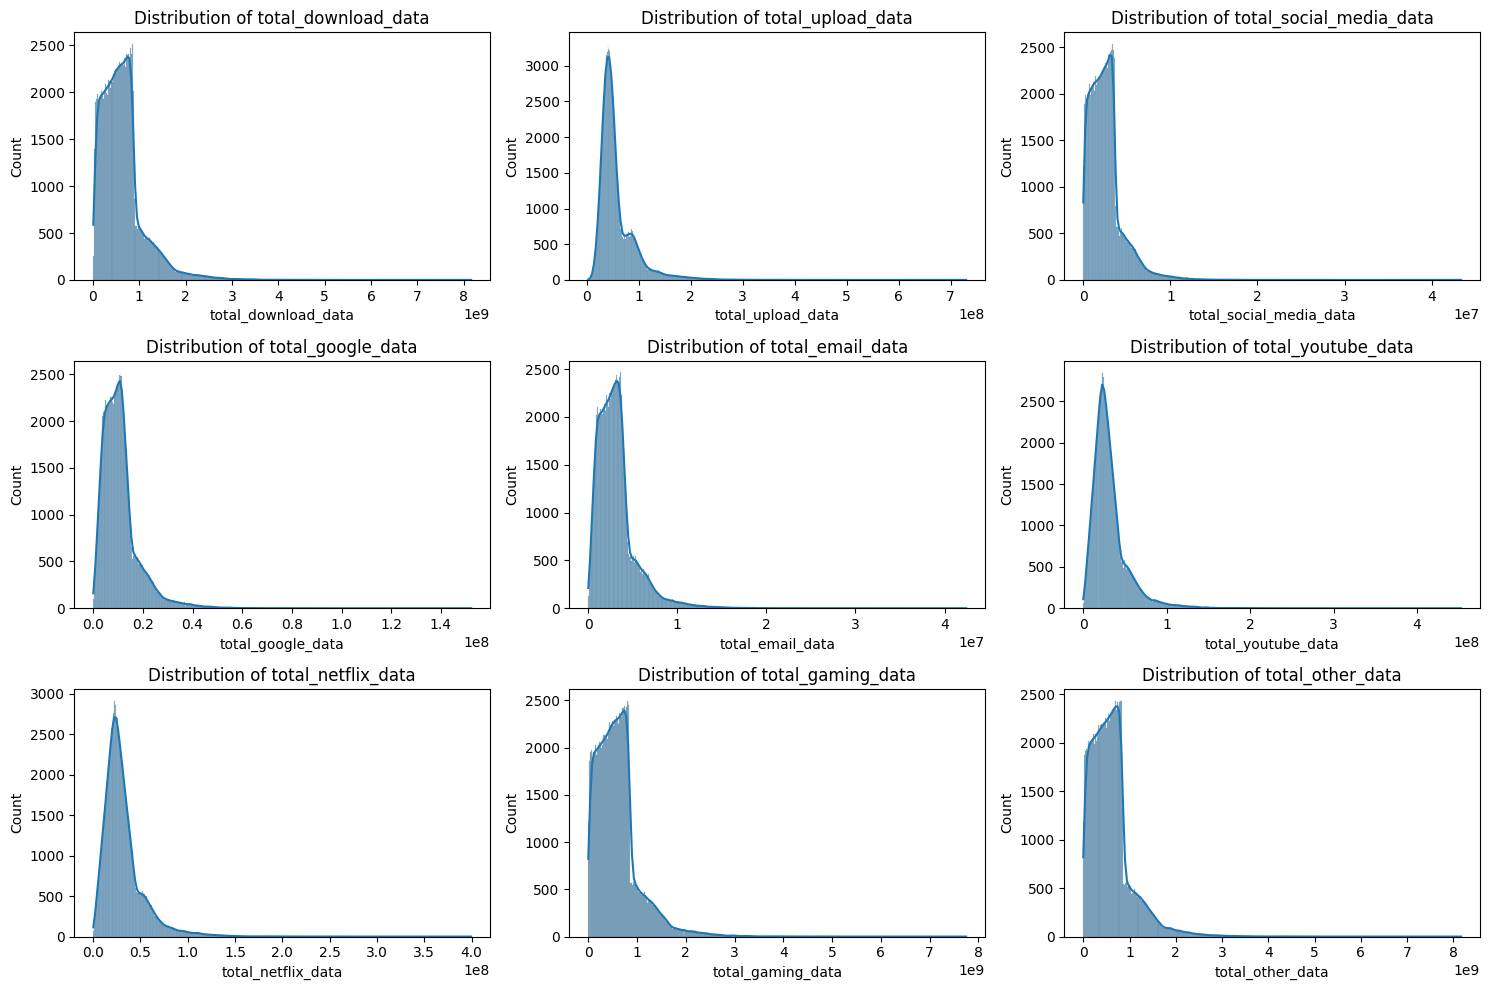

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each application data
plt.figure(figsize=(15, 10))
for i, col in enumerate(['total_download_data', 'total_upload_data', 'total_social_media_data',
                          'total_google_data', 'total_email_data', 'total_youtube_data', 
                          'total_netflix_data', 'total_gaming_data', 'total_other_data']):
    plt.subplot(3, 3, i+1)
    sns.histplot(user_behavior[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

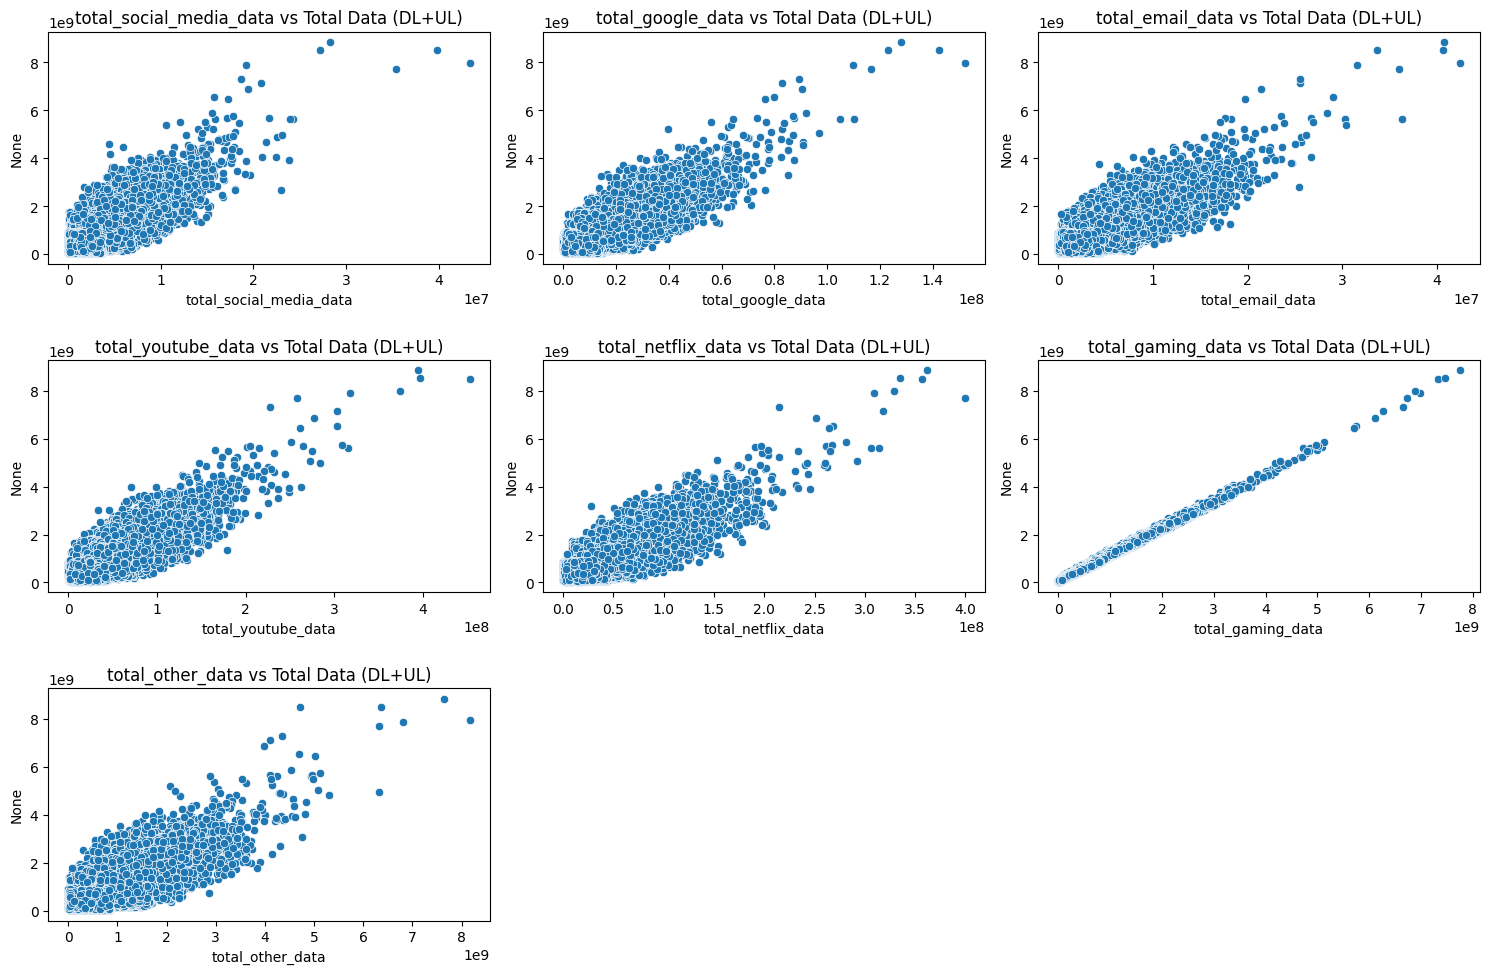

In [27]:
# Bivariate analysis: Scatter plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(['total_social_media_data', 'total_google_data', 'total_email_data',
                          'total_youtube_data', 'total_netflix_data', 'total_gaming_data', 'total_other_data']):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=user_behavior[col], y=user_behavior['total_download_data'] + user_behavior['total_upload_data'])
    plt.title(f'{col} vs Total Data (DL+UL)')
plt.tight_layout()
plt.show()

Correlation Matrix:
                          total_social_media_data  total_google_data  \
total_social_media_data                 1.000000           0.643044   
total_google_data                       0.643044           1.000000   
total_email_data                        0.634060           0.688418   
total_youtube_data                      0.659516           0.718448   
total_netflix_data                      0.659903           0.716173   
total_gaming_data                       0.590021           0.641956   
total_other_data                        0.591808           0.642544   

                         total_email_data  total_youtube_data  \
total_social_media_data          0.634060            0.659516   
total_google_data                0.688418            0.718448   
total_email_data                 1.000000            0.704659   
total_youtube_data               0.704659            1.000000   
total_netflix_data               0.705464            0.738396   
total_gaming_data   

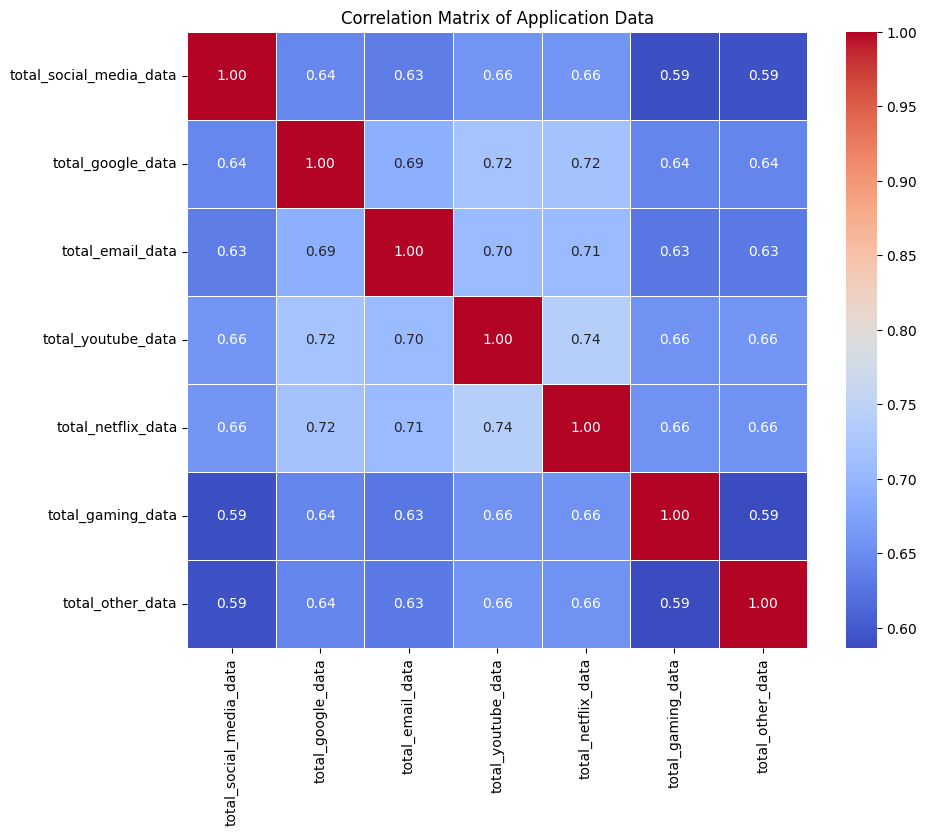

In [28]:
# Correlation matrix
correlation_matrix = user_behavior[['total_social_media_data', 'total_google_data', 'total_email_data',
                                    'total_youtube_data', 'total_netflix_data', 'total_gaming_data', 'total_other_data']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Application Data')
plt.show()

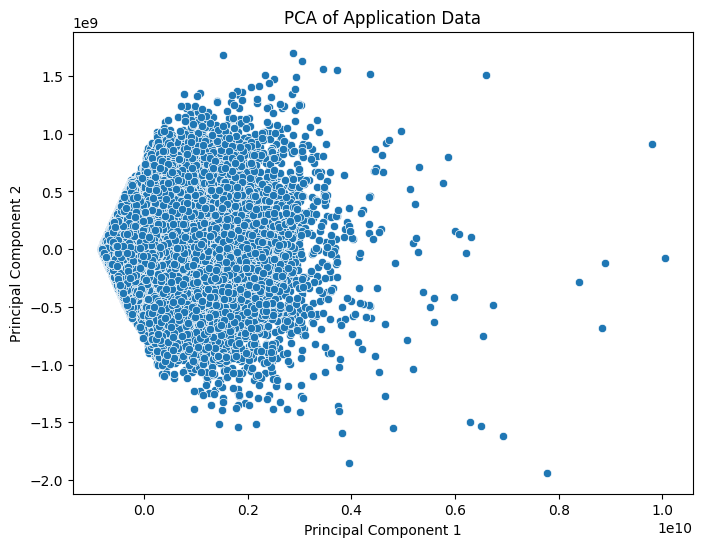

Explained Variance Ratio: [0.79264247 0.20626046]


In [29]:
from sklearn.decomposition import PCA

# Select relevant columns for PCA
pca_data = user_behavior[['total_social_media_data', 'total_google_data', 'total_email_data',
                          'total_youtube_data', 'total_netflix_data', 'total_gaming_data', 'total_other_data']]

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
plt.title('PCA of Application Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Interpretation of PCA results
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [6.94872114e-01 7.16830179e-02 5.69577803e-02 4.08260305e-02
 3.86792540e-02 3.24714535e-02 3.02715886e-02 2.61314736e-02
 8.10154282e-03 5.74459514e-06]


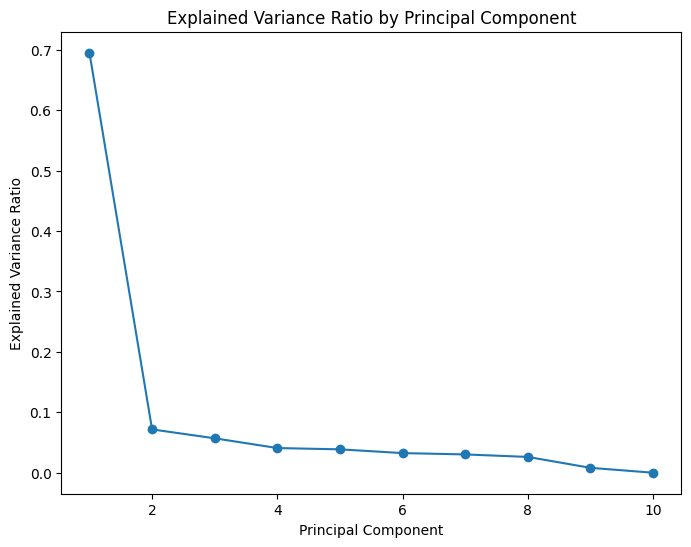

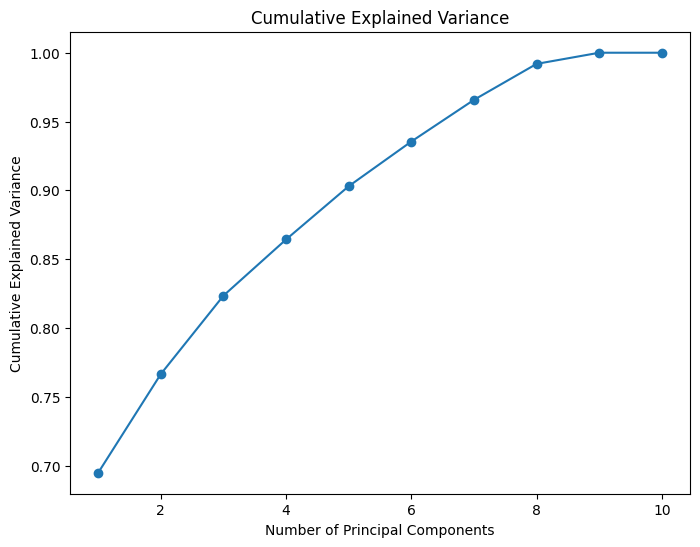

Feature Loadings:
    total_session_duration  total_download_data  total_upload_data  \
0                0.255731             0.324395           0.354781   
1               -0.312425             0.603221          -0.137347   
2                0.911793             0.113008          -0.126908   
3                0.007428             0.006164          -0.005655   
4                0.068071             0.032977          -0.235514   
5               -0.015129             0.003074          -0.226874   
6               -0.011954            -0.007275          -0.154538   
7               -0.022296             0.001177           0.006957   
8               -0.008284            -0.046769           0.840625   
9               -0.000318             0.717457           0.040121   

   total_social_media_data  total_google_data  total_email_data  \
0                 0.299824           0.321260          0.316245   
1                -0.152485          -0.121617         -0.141773   
2                -0.

c:\Users\neba\Documents\telecom_analysis\env\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\neba\Documents\telecom_analysis\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\neba\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\neba\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\neba\Ap

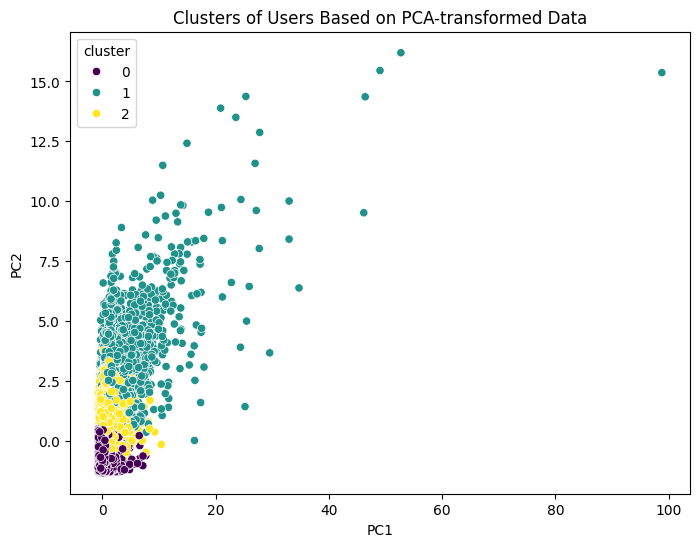

Cluster Centers (in original feature space):
 [[-0.34860869 -0.61396405 -0.05539183  0.10218751 -0.23450149 -0.13908212
   0.18972204  0.81288789 -0.14458587 -0.38189214]
 [ 2.85836346  5.02196912  0.68895237 -0.58795946  2.05328975  1.29962837
  -1.30535777 -6.14961657  1.37239249  3.16890326]
 [ 0.67495591  1.1907271   0.06844394 -0.23915358  0.4324547   0.2429634
  -0.40868699 -1.65907093  0.24905172  0.73317689]]


In [30]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'user_behavior' is the DataFrame from Task 1.1 and contains the aggregated data

# Select only the numeric columns for PCA (excluding IMSI)
numeric_columns = [
    'total_session_duration', 'total_download_data', 'total_upload_data', 
    'total_social_media_data', 'total_google_data', 'total_email_data', 
    'total_youtube_data', 'total_netflix_data', 'total_gaming_data', 'total_other_data'
]

# Standardize the data before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_behavior[numeric_columns])

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Step 2: Feature Loadings (Principal Components)
loadings = pd.DataFrame(pca.components_, columns=numeric_columns)
print("Feature Loadings:\n", loadings)

# Step 3: Clustering (K-means)
# Choose the number of clusters based on the explained variance or other criteria (e.g., elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters
user_behavior['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=user_behavior['cluster'], palette='viridis')
plt.title('Clusters of Users Based on PCA-transformed Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Optional: Analyze the cluster centers
cluster_centers = pca.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (in original feature space):\n", cluster_centers)